<!-- Title -->
<h1 align="center">
  Digital Epidemiology Project
</h1>

<!-- Subtitle -->
<h2 align="center">
   Data-Driven Stochastic Agent-Based Metapopulation Model
</h2>

<h3 align="center">
  Authors
</h3>

| Name | Contacts | Contribution | 
| :---- | :---- | :---- |
| Pietro Monticone | [Mail](pietro.monticone@edu.unito.it) | Geospatial data exploration, selection and processing | 
|  | [GitHub](https://github.com/pitmonticone) | Contact data exploration, selection and processing | 
|  | [Twitter](https://twitter.com/PietroMonticone) | Mobility data exploration, selection and processing | 
|  |  | Epidemiological data exploration, selection and processing | 
|  |  | Policy data exploration, selection and processing | 
|  |  | Age-specific IFR calibration |
|  |  | Surveillance module design and implementation |
|  |  | `DigitalEpidemiology.jl` module development (50%) |
| Davide Orsenigo | [Mail](davide.orsenigo@edu.unito.it) | Population data exploration, selection and processing | 
|  | [GitHub](https://github.com/daorse) | Diagnostic data exploration, selection and processing | 
|  | [Twitter](https://twitter.com/DavideOrsenigo) | Age-specific symptomatic fraction calibration | 
|  |  | Inter-compartment transition delays calibration |
|  |  | `DigitalEpidemiology.jl` module development (50%) |

<h3 align="center">
  Computational Framework
</h3> 

| Language  | Activity |
| :---- | :---- |
| [Python](https://www.python.org/) | Data collection | 
| | Data wrangling | 
|  | Data visualization | 
| [Julia](https://julialang.org) | Modelling | 
|  | Scenario Analysis | 

<h3 align="center">
  Parameters
</h3> 

| Name | Value | Description | References | 
| :---- | :---- | :---- | :---- | 
| $y$ | $[1,6]$ | Range of "young" age groups |  | 
| $m$ | $[7,12]$ | Range of "middle" age groups |  | 
| $o$ | $[13,16]$ | Range of "old" age groups |  | 
|  |  |  |  | 
| $s_y$ | $$\sim \mathcal{N}(\mu=0.5,\sigma=0.1;[0,0.5])$$ | Symptomatic fraction on infection for "young" age groups|  
| $s_m$ | $0.5$ | Symptomatic fraction on infection  for "middle" age groups|  | 
| $s_o$ | $\sim \mathcal{N}(\mu=0.5,\sigma=0.1;[0.5,1])$ | Symptomatic fraction on infection for "old" age groups |  |
|  |  |  |  |
| $d_E$ | $\sim \mathcal{\Gamma}(\mu=3,k=4)$ | Incubation period |  |
| $d_P$ | $\sim \mathcal{\Gamma}(\mu=1.5,k=4)$ | Duration of infectiousness in days during the pre-symptomatic phase |  |
| $d_A$ | $\sim \mathcal{\Gamma}(\mu=3.5,k=4)$ | Duration of infectiousness in days during the a-symptomatic phase |  |
| $d_S$ | $\sim \mathcal{\Gamma}(\mu=5,k=4)$ | Duration of infectiousness in days during the symptomatic phase |  |

<h3 align="center">
  Diagnostic Strategies
</h3> 

| Role | Region | Priority | Distribution | Contact-Tracing | 
| :---- | :---- | :---- | :---- | :----: |
| Passive | National | Random | Uniform | No |
|  |  |  |  | Yes |
|  |  | Targeted | Age-based / Ex-Ante IFR | No |
|  |  |  | | Yes |
|  |  |  | Symptom-based / Ex-Post IFR | No |
|  |  |  | | Yes |
|  | Provincial | Random | Uniform | No |
|  |  |  |  | Yes |
|  |  | Targeted | Age-based / Ex-Ante IFR | No |
|  |  |  | | Yes |
|  |  |  | Symptom-based / Ex-Post IFR | No |
|  |  |  | | Yes |
| Active | National | Random | Uniform | No |
|  |  |  |  | Yes |
|  |  | Targeted | Age-based / Ex-Ante IFR | No |
|  |  |  | | Yes |
|  |  |  | Symptom-based / Ex-Post IFR | No |
|  |  |  | | Yes |
|  | Provincial | Random | Uniform | No |
|  |  |  |  | Yes |
|  |  | Targeted | Age-based / Ex-Ante IFR | No |
|  |  |  | | Yes |
|  |  |  | Symptom-based / Ex-Post IFR | No |
|  |  |  | | Yes |

* All the above with behavioral module: endogenous, individual-based physical distancing (local and global)
* All the above with behavioral module: exogeneous, enforced physical distancing (local and global lockdown)
* **Special one**: Active, provincial, targeted, symptom-based, symptomatic-is-positive, contact-tracing, endogenous & exogenous distancing: assume all symptomatic patients to be **positive** ($I_s$) without testing them (accepting the uncertainty of the symptom-based MD diagnosis) in order to allocate more diagnostic resources to the active surveillance of exposed, asymptomatic, vulnerable patients.


## Desiderata
1. Design compartmental diagram for epidemic ($\alpha_X$, $d_X$, $\beta_X(age)$,...) and surveillance systems  ($O,N,P,H/W,R$)
1. Implement timeline of policy interventions
1. Import real COVID-19 data for Italy (tests, lockdown_mobility,...)
1. Implement contact-tracing app and centrality-based passive and active surveillance strategies


## Age-Specific Distributions 
* Susceptibility to infection upon contact with an infectious person $\mathcal{N}(\mu=0.1,\sigma=0.023, min=0)$ 

## User

In [1]:
#@everywhere user="PietroMonticone1";
#user="PietroMonticone2";
#user="DavideOrsenigo";

## Modules

In [2]:
# Parallel Computation
using Distributed
addprocs(4);

In [3]:
@everywhere user="PietroMonticone1";
#user="PietroMonticone2";
#user="DavideOrsenigo";

In [4]:
# Data Management 
@everywhere using DataFrames, DataFramesMeta, DrWatson, Queryverse
# Statistics
@everywhere using StatsBase, Distributions, Random
# Graphs 
@everywhere using LightGraphs, SimpleWeightedGraphs, GraphIO, GraphPlot
# Modelling
@everywhere using Agents
# Numerical Computation 
@everywhere using LinearAlgebra
# Visualization
@everywhere using Plots, AgentsPlots, PlotThemes, Images, ImageIO

# Custom Module
if user == "PietroMonticone1"
    @everywhere Epi = include("/Users/Pit/GitHub/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/DigitalEpidemiology.jl")
elseif user == "PietroMonticone2"
    @everywhere Epi = include("/Users/pietromonticone/github/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/DigitalEpidemiology.jl")
elseif user == "PietroMonticone2"
    @everywhere Epi = include(raw"C:\Users\Utente\Desktop\Progetti\GitHub\DigitalEpidemiologyProject\Notebooks\Modelling\Julia\MetapopABM\DigitalEpidemiology.jl");
end

## Data

### Population

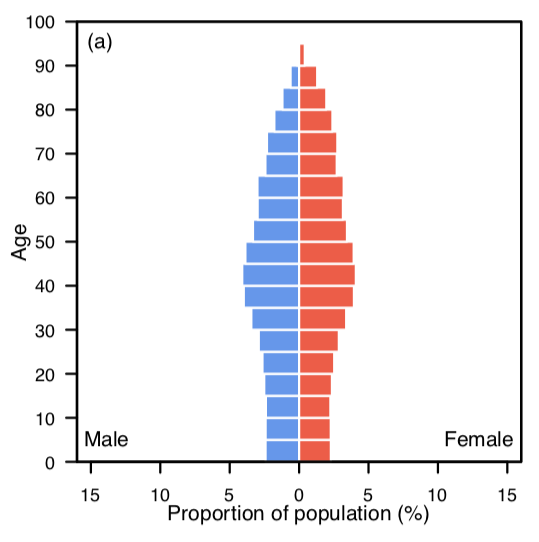

In [5]:
# Load population data
@everywhere population_data = Epi.LoadData("ProvincialPopulation", user);
# Load age-stratified population data
@everywhere age_population_data = Epi.LoadData("AgeStratifiedProvincialPopulation", user); 
# Load population pyramid image 
population_pyramid = Epi.LoadImage("PopulationPyramid", user) 

### Contact

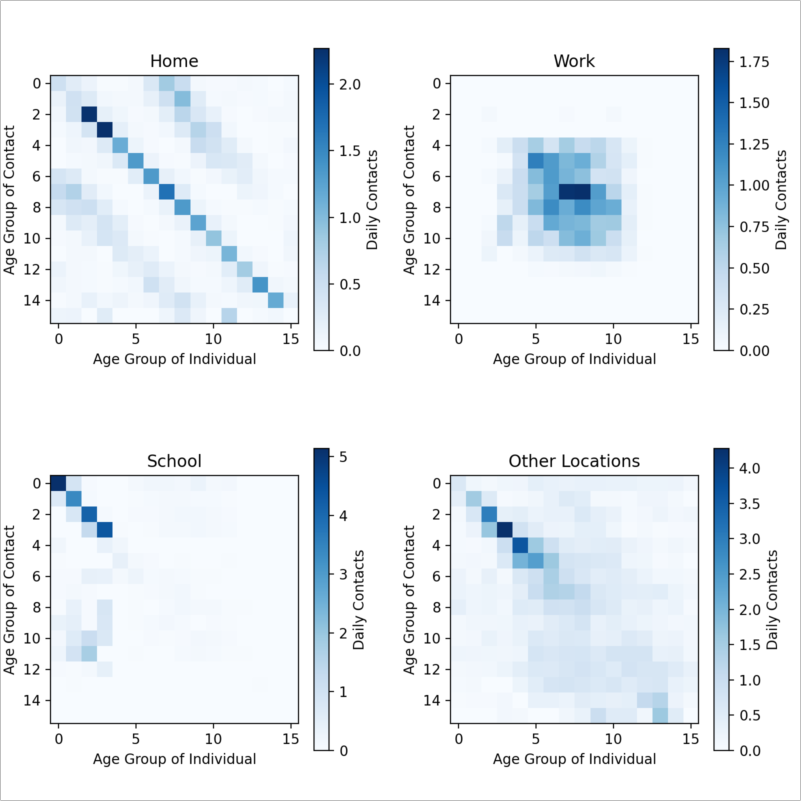

In [6]:
# Load contact data for all locations
@everywhere all_contact_data=Epi.LoadData("AllEdgeList", user)
# Build contact graph for all locations
@everywhere all_contact_graph=SimpleWeightedDiGraph(all_contact_data[1].+1, all_contact_data[2].+1, all_contact_data[3]);
# Load contact matrix plot for all locations
all_contact_image=Epi.LoadImage("All", user)

# Load contact data for home
@everywhere home_contact_data=Epi.LoadData("HomeEdgeList", user)
# Build contact graph for home
@everywhere home_contact_graph=SimpleWeightedDiGraph(home_contact_data[1].+1, home_contact_data[2].+1, home_contact_data[3]);
# Load contact matrix plot for home
home_contact_image=Epi.LoadImage("Home", user)

# Load contact data for work
@everywhere work_contact_data=Epi.LoadData("WorkEdgeList", user)
# Build contact graph for work
@everywhere work_contact_graph=SimpleWeightedDiGraph(work_contact_data[1].+1, work_contact_data[2].+1, work_contact_data[3]);
# Load contact matrix plot for work
work_contact_image=Epi.LoadImage("Work", user)

# Load contact data for school
@everywhere school_contact_data=Epi.LoadData("SchoolEdgeList", user)
# Build contact graph for school
@everywhere school_contact_graph=SimpleWeightedDiGraph(school_contact_data[1].+1, school_contact_data[2].+1, school_contact_data[3]);
# Load contact matrix plot for school
school_contact_image=Epi.LoadImage("School", user)

# Load contact data for other locations
@everywhere other_contact_data=Epi.LoadData("OtherEdgeList", user)
# Build contact graph for other locations
@everywhere other_contact_graph=SimpleWeightedDiGraph(other_contact_data[1].+1, other_contact_data[2].+1, other_contact_data[3]);
# Load contact matrix plot for other locations
other_contact_image=Epi.LoadImage("Other", user)

[home_contact_image work_contact_image
school_contact_image other_contact_image]
# REVERSE AXES!!

### Mobility

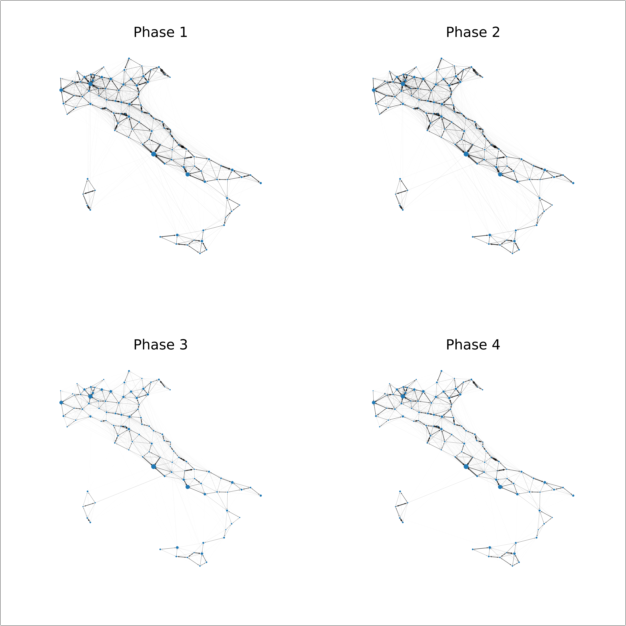

In [7]:
# Load mobility data
@everywhere @everywhere mobility_data_phase1 = Epi.LoadData("Flow1", user)
@everywhere mobility_data_phase2 = Epi.LoadData("Flow2", user)
@everywhere mobility_data_phase3 = Epi.LoadData("Flow3", user)
@everywhere mobility_data_phase4 = Epi.LoadData("Flow4", user)
# Build mobility graphs 
@everywhere mobility_graph_phase1 = SimpleWeightedDiGraph(mobility_data_phase1[1], mobility_data_phase1[2], mobility_data_phase1[3])
@everywhere mobility_graph_phase2 = SimpleWeightedDiGraph(mobility_data_phase2[1], mobility_data_phase2[2], mobility_data_phase2[3])
@everywhere mobility_graph_phase3 = SimpleWeightedDiGraph(mobility_data_phase3[1], mobility_data_phase3[2], mobility_data_phase3[3])
@everywhere mobility_graph_phase4 = SimpleWeightedDiGraph(mobility_data_phase4[1], mobility_data_phase4[2], mobility_data_phase4[3])
# Build initial mobility graph
@everywhere mobility_graph = SimpleWeightedDiGraph(mobility_data_phase1[1], mobility_data_phase1[2], mobility_data_phase1[3])
# Remove the 104/5/6/7th node: provincial code doesn't exist
for i in 1:4
    rem_vertex!(mobility_graph_phase1, 104)
    rem_vertex!(mobility_graph_phase2, 104)
    rem_vertex!(mobility_graph_phase3, 104)
    rem_vertex!(mobility_graph_phase4, 104)
    rem_vertex!(mobility_graph, 104)
end
# Load mobility images
mobility_phase1_image = Epi.LoadImage("Phase1", user)	
mobility_phase2_image = Epi.LoadImage("Phase2", user)
mobility_phase3_image = Epi.LoadImage("Phase3", user)
mobility_phase4_image = Epi.LoadImage("Phase4", user)
#Display mobility images
[mobility_phase1_image mobility_phase2_image
mobility_phase3_image mobility_phase4_image]

### Epidemiological

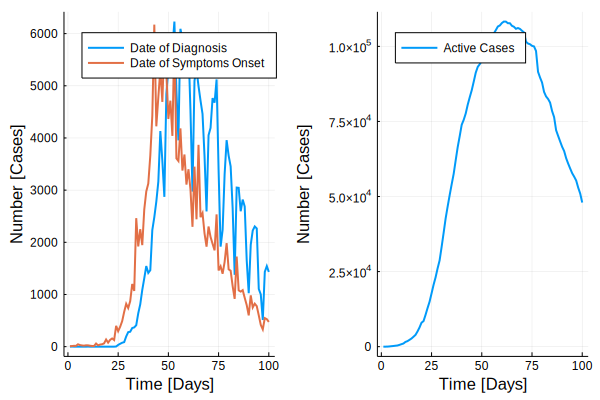

In [8]:
# Load data on confirmed COVID-19 active cases
@everywhere active_cases=Epi.LoadData("Active", user) 
# Load data on confirmed COVID-19 cases by date of diagnosis and symptoms onset
@everywhere symptoms_diagnosis_cases=Epi.LoadData("SymptomsDiagnosis", user)
# Load data on COVID-19 tests and tested patients
@everywhere tests=Epi.LoadData("Tests", user) 

# Plot time series of confirmed COVID-19 cases by date of diagnosis vs. symptoms onset
plot_cases=plot(1:100,symptoms_diagnosis_cases["Diagnosis"][1:100],
                label="Date of Diagnosis",
                xlab="Time [Days]",
                ylabel="Number [Cases]",
                #title="COVID-19 Confirmed Cases in Italy", 
                legend=:topleft,
                lw=2)
            plot!(plot_cases,1:100,symptoms_diagnosis_cases["Symptoms"][1:100],
                 label="Date of Symptoms Onset",
                 lw=2);
# Plot time series confirmed confirmed COVID-19 active cases 
plot_active=plot(1:100,active_cases["Active Cases"][1:100],
    label="Active Cases",
    xlab="Time [Days]",
    ylabel="Number [Cases]",
    #title="COVID-19 Confirmed Cases in Italy", 
    legend=:topleft,
    lw=2);
# Display time series 
plot(plot_cases, plot_active, layout=2)

## Agent Type

In [9]:
# Patient Definition
@everywhere mutable struct Patient <: AbstractAgent
    id::Int           # identity code ∈ ℕ               
    pos::Int          # location node ∈ ℕ 
    age_group::Int    # age group ∈ [1,16] ⊂ ℕ
    residence::Int    # residence node ∈ ℕ || RESIDENCE!!
    household::Array  # household
    #workplace::Array  # workplace
    status::Symbol    # ∈ {S,E,I_a,I_p,I_s,H,ICU,R,D}
    status_delay_left::Int   
    diagnosis_delay_left::Int
    diagnosis::Symbol # ∈ {O,N,P,W,R}
    #prescription::Symbol # ∈ {O, Q, ICU}
    #serological
    #contact-tracing
    #fear, risk aversion -> individual-based social distancing  
end;

## Dynamics

In [10]:
# MACRO-DYNAMICS
@everywhere function model_step!(model)
	model.t+=1
	#Epi.test!(model,"base_passive_random_uniform_national",capacity)
	#Epi.test!(model,"passive_random_uniform_national",capacity)
	#Epi.test!(model,"passive_random_uniform_provincial",capacity) #ONLY FOR LARGE N
	Epi.test!(model,"passive_biased_symptoms_national",capacity)
	#Epi.test!(model,"passive_biased_symptoms_provincial",capacity)
	if model.t≤11
		Epi.phase1!(model)
	elseif model.t≤11+22
		Epi.phase2!(model)
    elseif model.t>11+22 #model.t≤11+22+65
		Epi.phase3!(model)
    #else
	#	Epi.phase4!(model) #elseif model.t≤11+22+65+28
	end
end;

# MICRO-DYNAMICS
@everywhere function agent_step!(agent, model)
    # Remove died patients
	agent.status==:D && return
    
    # Exposure at home
    if length(agent.household)!=0   #&& agent.pos == agent.residence 
        home_contacted_agents=Epi.contact!(agent, model,"home")
        Epi.get_exposed!(agent, model, home_contacted_agents)
    end
    
    # Mobility dynamics 
    if agent.diagnosis !=:P
        Epi.migrate!(agent, model)  
	# Exposure at work
        work_contacted_agents=Epi.contact!(agent, model,"work")  
        Epi.get_exposed!(agent, model, work_contacted_agents)    
    # Exposure at school
        if model.phase != 3 
            school_contacted_agents=Epi.contact!(agent, model,"school") 
            Epi.get_exposed!(agent, model, school_contacted_agents) 
        end
    # Exposure at other locations
        other_contacted_agents=Epi.contact!(agent, model,"other") 
        Epi.get_exposed!(agent, model, other_contacted_agents) 
    end
    
    # Infection dynamics
	Epi.get_infected!(agent,model) 
    # Symptoms onset
	Epi.get_symptoms!(agent,model)       
    # Recovery dynamics
	Epi.recover_or_die!(agent, model)           
    
    # Mobility dynamics 
	Epi.move_back_home!(agent, model)
    
    # Delays update 
	if agent.status_delay_left>0
		agent.status_delay_left-=1
	end
    if agent.diagnosis_delay_left>0
		agent.diagnosis_delay_left-=1
	end
end;

## Parameters

In [11]:
# Time 
@everywhere δt=1
@everywhere nsteps=250
@everywhere tf=nsteps*δt
@everywhere t=0:δt:tf;

In [12]:
# Population
@everywhere scale_factor=2400
@everywhere provincial_pops=round.(Int, population_data.population./scale_factor) 
@everywhere age_provincial_pops=round.(Int, age_population_data./scale_factor) 
@everywhere N = sum(Array(age_provincial_pops))  # number of agents
@everywhere M = length(provincial_pops)          # number of subpopulations
@everywhere K = length(age_provincial_pops[1])   # number of age groups (16)

In [13]:
# Migration rates
@everywhere h=0.8 #home

# Initial conditions
@everywhere I0=1 # round(Int, N/2000)

# Health system
@everywhere capacity=round(Int, N*1*10^(-3)); # Total tests in phase 2 and 3 

## Modelling Framework

### Epidemic Module

In [14]:
# Load images of the compartmental epidemic model diagrams 
@everywhere epidemic_model_diagram = load("/Users/Pit/GitHub/DigitalEpidemiologyProject/Images/EpidemicModelDiagram.png")

### Surveillance Module

In [15]:
# Load images of the compartmental surveillance/diagnostic model diagrams 
@everywhere surveillance_model_diagram=load("/Users/Pit/GitHub/DigitalEpidemiologyProject/Images/SurveillanceModelDiagram.png")

### Behavioral Module

In [16]:
# Load images of the compartmental behavioral model diagrams 

### Initialization 

In [17]:
# Model initialization 
@everywhere function InitializeModel(t::Int, provincial_pops::Array{Int,1}, age_provincial_pops::DataFrame,
		home_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, work_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, school_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, other_contact_graph::SimpleWeightedDiGraph{Int64,Float64},
		mobility_graph::SimpleWeightedDiGraph{Int64,Float64},mobility_graph_phase1::SimpleWeightedDiGraph{Int64,Float64},mobility_graph_phase2::SimpleWeightedDiGraph{Int64,Float64},mobility_graph_phase3::SimpleWeightedDiGraph{Int64,Float64},mobility_graph_phase4::SimpleWeightedDiGraph{Int64,Float64},
		h::Real,I0::Int)
	
	# Set populations
	N = sum(Array(age_provincial_pops))  # number of agents
	M = length(provincial_pops)          # number of subpopulations
	K = length(age_provincial_pops[1])   # number of age groups (16)
	# Initialize id 
	id = 0    
	# Initialize Phase 
	phase = 1
	# Define the dictionary of model properties
	properties = @dict(t, phase, 
		home_contact_graph, work_contact_graph, school_contact_graph, other_contact_graph,
		mobility_graph_phase1,mobility_graph_phase2,mobility_graph_phase3,mobility_graph_phase4,
		provincial_pops, age_provincial_pops,
		h, I0,
		N, M, K)

	# Instantiate graph ambient space
	space = GraphSpace(mobility_graph) 
	# Instatiate model
	model = ABM(Patient, space; properties = properties)

	# Populate the model
	for province ∈ 1:M
		for age ∈ 1:K 
			for n ∈ 1:age_provincial_pops[province][age]
				id+=1
				residence=province
				household=[]
                #workplace=[]
				pos=residence
				age_group=age
				status=:S
				status_delay_left=-1
                diagnosis_delay_left=-1
				diagnosis=:O
				add_agent!(pos, model, age_group, residence, household, status, status_delay_left, diagnosis_delay_left, diagnosis)
			end
		end
	end
    
    # Create a list of all agents
    agents = [agent for agent in allagents(model)]
    
    #Initialize households & workplaces
    for agent in agents 
        Epi.InitializeHousehold(agent, model)
        #InitializeWorkplace(agent, model)
    end
    
    # Initialize infected agents 
    milan_agents = get_node_agents(15,model)
    
	for agent in StatsBase.sample(milan_agents, I0)
		agent.status = :E
		agent.status_delay_left = round(Int, rand(Gamma(3,4)))
    end
    
	#=for agent in agents
        if length(agent.household) != 0 
            agent.household=InitializeHousehold(agent, model)
            household=agent.household
            push!(household,agent)
            for member in agent.household
                member.household=[a for a in household if a.id != member.id]
            end
        end
	end
    
    # Initialize workplaces 
	for agent in agents
        if length(agent.workplace) != 0
            agent.workplace=InitializeWorkplace(agent, model)
            workplace=agent.workplace
            push!(workplace,agent)
            for member in agent.workplace
                member.workplace=[a for a in workplace if a.id != member.id]
            end
        end
    end=#
	
	return model
end;

### Simulations 

In [18]:
# Seed Selection
#@everywhere Random.seed!(1234);
# Initialize the model
@everywhere model = InitializeModel(0,
    # Population 
	provincial_pops, age_provincial_pops,
    # Contact  
	home_contact_graph, work_contact_graph, school_contact_graph, other_contact_graph,
    # Mobility  
	mobility_graph,mobility_graph_phase1,mobility_graph_phase2,mobility_graph_phase3,mobility_graph_phase4,
    # Free parameters
	h, I0)

# Surveillance 
@everywhere susceptible(status) = count(i == :S for i in status)
@everywhere exposed(status) = count(i == :E for i in status)
@everywhere infected_presymptomatic(status) = count(i == :I_p for i in status)
@everywhere infected_symptomatic(status) = count(i == :I_s for i in status)
@everywhere infected_asymptomatic(status) = count(i == :I_a for i in status)
@everywhere infected(status) =exposed(status)+infected_asymptomatic(status)+infected_presymptomatic(status)+infected_symptomatic(status)
# @everywhere active(diagnosis) = count(i == :P for i in diagnosis);

@everywhere recovered(status) = count(i == :R for i in status)
@everywhere dead(status) = count(i == :D for i in status);
###total_tests = nsteps * capacity
###daily_tests = capacity
@everywhere tested(diagnosis) = count(i != :O for i in diagnosis);
#daily_tested(diagnosis)= count
@everywhere positive(diagnosis) = count(i == :P for i in diagnosis); # active
@everywhere positive_rate(diagnosis)=positive(diagnosis)/tested(diagnosis)
#positive_rate(diagnosis)=positive(diagnosis)/capacity # new_positives/cpacity or #positives/ || "daily tests" != "daily tested people"
@everywhere infected_rate(status)= infected(status) / model.N

# Data Collection
@everywhere to_collect = 
    [(:status, susceptible),(:status, exposed),(:status, infected_presymptomatic),(:status, infected_symptomatic),(:status, infected_asymptomatic),
     (:status, infected),(:status, recovered),(:status, dead),(:status, infected_rate),
	 (:diagnosis, tested),(:diagnosis, positive),(:diagnosis, positive_rate)]

data, _ = @time run!(model, agent_step!, model_step!, nsteps; 
                     adata = to_collect, replicates=4, parallel=true);

2622.109199 seconds (8.15 M allocations: 402.700 MiB, 0.00% gc time)


## Visualizations

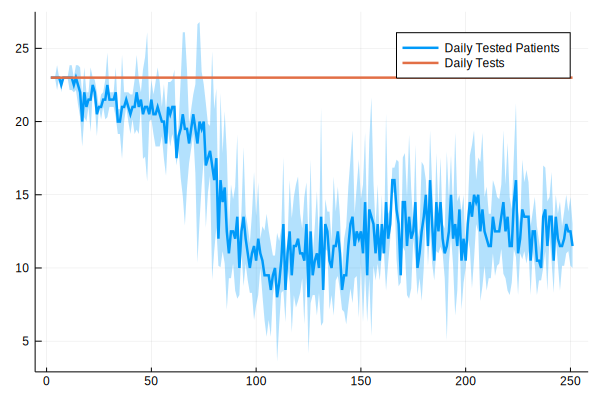

In [19]:
gd = groupby(data, [:step])
timestep = 2:length(gd)

ft=[quantile(gd[i].tested_diagnosis-gd[i-1].tested_diagnosis,0.05) for i in timestep]
mt=[quantile(gd[i].tested_diagnosis-gd[i-1].tested_diagnosis,0.5) for i in timestep]
nt=[quantile(gd[i].tested_diagnosis-gd[i-1].tested_diagnosis,0.95) for i in timestep]
	
plot(timestep, mt[2:length(mt)],
	label="Tested Patients",
	xlab="Time",
	ylabel="Number",
	#title="DC=$capacity | Χ²=$Χ", 
	legend=:bottomright,
	lw=2.5; 
	ribbon=[mt-ft,nt-mt],
    fillalpha=0.3)
plot(timestep, mt,
	label="Daily Tested Patients",
	lw=2.5;
	ribbon=[mt-ft,nt-mt],
    fillalpha=0.3)
plot!(timestep, [capacity for i in timestep],
      label="Daily Tests",
      lw=2.5)

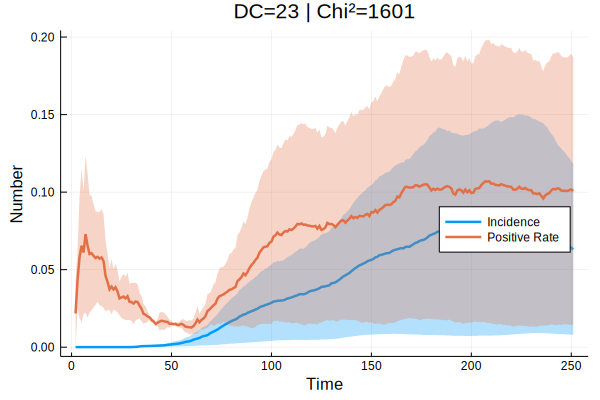

In [20]:
f1=[quantile(gd[i].infected_rate_status,0.05) for i in timestep]
m1=[quantile(gd[i].infected_rate_status,0.5) for i in timestep] 
n1=[quantile(gd[i].infected_rate_status,0.95) for i in timestep]

f2=[quantile(gd[i].positive_rate_diagnosis,0.05) for i in timestep]
m2=[quantile(gd[i].positive_rate_diagnosis,0.5) for i in timestep] 
n2=[quantile(gd[i].positive_rate_diagnosis,0.95) for i in timestep]

Χ = round(Int, sum(((m2-m1).^2)./m1))

plot(timestep, m1,
	label="Incidence",
	xlab="Time",
	ylabel="Number",
	title="DC=$capacity | Chi²=$Χ", 
	legend=:right,
	lw=2.5; 
	ribbon=[m1-f1,n1-m1],
    fillalpha=0.3)
plot!(timestep, m2,
	label="Positive Rate",
	lw=2.5; 
	ribbon=[m2-f2,n2-m2],
    fillalpha=0.3)

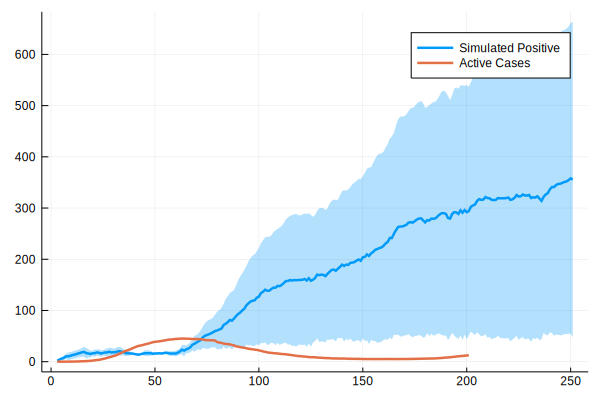

In [21]:
# Ensemble of simulated positives
f=[quantile(gd[i].infected_status,0.05) for i in timestep]
m=[quantile(gd[i].infected_status,0.5) for i in timestep] 
n=[quantile(gd[i].infected_status,0.95) for i in timestep]
# Ensemble of real positives
f0=[quantile(gd[i].positive_diagnosis,0.05) for i in timestep]
m0=[quantile(gd[i].positive_diagnosis,0.5) for i in timestep] 
n0=[quantile(gd[i].positive_diagnosis,0.95) for i in timestep]

#=plot(timestep, m,
	label="Simulated Infected",
	xlab="Time",
	ylabel="Number",
	#title="DC=$capacity | Χ²=$Χ", 
	legend=:topright,
	lw=2.5;
	ribbon=[m-f,n-m],
    fillalpha=0.3)=#
plot(timestep[2:end],m0[2:end],
	  label="Simulated Positive",
	  lw=2.5; 
	  ribbon=[m0-f0,n0-m0],
      fillalpha=0.3)
plot!(timestep[2:200],active_cases["Active Cases"]/scale_factor,
	  label="Active Cases",
	  lw=2.5)

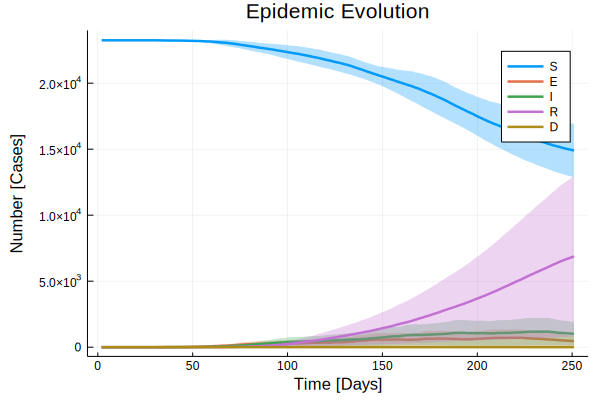

In [22]:
# Ensemble of susceptibles
f3=[quantile(gd[i].susceptible_status,0.05) for i in timestep]
m3=[quantile(gd[i].susceptible_status,0.5) for i in timestep] 
n3=[quantile(gd[i].susceptible_status,0.95) for i in timestep]
# Ensemble of exposed
f4=[quantile(gd[i].exposed_status,0.05) for i in timestep]
m4=[quantile(gd[i].exposed_status,0.5) for i in timestep] 
n4=[quantile(gd[i].exposed_status,0.95) for i in timestep]
# Ensemble of infected
f5=[quantile(gd[i].infected_presymptomatic_status+gd[i].infected_symptomatic_status+gd[i].infected_asymptomatic_status,0.05) for i in 2:length(gd)]
m5=[quantile(gd[i].infected_presymptomatic_status+gd[i].infected_symptomatic_status+gd[i].infected_asymptomatic_status,0.5) for i in 2:length(gd)] 
n5=[quantile(gd[i].infected_presymptomatic_status+gd[i].infected_symptomatic_status+gd[i].infected_asymptomatic_status,0.95) for i in 2:length(gd)]
# Ensemble of recovered
f6=[quantile(gd[i].recovered_status,0.05) for i in timestep]
m6=[quantile(gd[i].recovered_status,0.5) for i in timestep] 
n6=[quantile(gd[i].recovered_status,0.95) for i in timestep]
# Ensemble of died
f7=[quantile(gd[i].dead_status,0.05) for i in timestep]
m7=[quantile(gd[i].dead_status,0.5) for i in timestep] 
n7=[quantile(gd[i].dead_status,0.95) for i in timestep]

# Plot
plot(timestep, m3,
	label="S",
	xlabel="Time [Days]",
	ylabel="Number [Cases]",
	title="Epidemic Evolution", 
	legend=:topright,
	lw=2.5; 
	ribbon=[m3-f3,n3-m3],
    fillalpha=0.3)
plot!(timestep, m4,label="E",lw=2.5; ribbon=[m4-f4,n4-m4],fillalpha=0.3)
plot!(timestep, m5,label="I",lw=2.5; ribbon=[m5-f5,n5-m5],fillalpha=0.3)
plot!(timestep, m6,label="R",lw=2.5; ribbon=[m6-f6,n6-m6],fillalpha=0.3)
plot!(timestep, m7,label="D",lw=2.5; ribbon=[m7-f7,n7-m7],fillalpha=0.3)

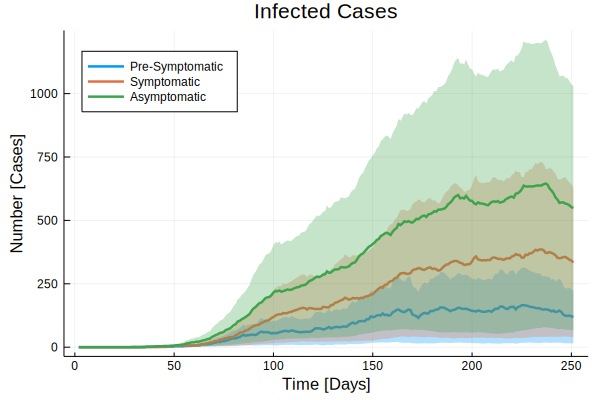

In [23]:
f8=[quantile(gd[i].infected_presymptomatic_status,0.05) for i in timestep]
m8=[quantile(gd[i].infected_presymptomatic_status,0.5) for i in timestep] 
n8=[quantile(gd[i].infected_presymptomatic_status,0.95) for i in timestep]

f9=[quantile(gd[i].infected_symptomatic_status,0.05) for i in timestep]
m9=[quantile(gd[i].infected_symptomatic_status,0.5) for i in timestep] 
n9=[quantile(gd[i].infected_symptomatic_status,0.95) for i in timestep]

f10=[quantile(gd[i].infected_asymptomatic_status,0.05) for i in timestep]
m10=[quantile(gd[i].infected_asymptomatic_status,0.5) for i in timestep] 
n10=[quantile(gd[i].infected_asymptomatic_status,0.95) for i in timestep]

plot(timestep, m8,
	label="Pre-Symptomatic",
	xlabel="Time [Days]",
	ylabel="Number [Cases]",
	title="Infected Cases", 
	legend=:topleft,
	lw=2.5; 
	ribbon=[m8-f8,n8-m8],
    fillalpha=0.3)
plot!(timestep, m9,label="Symptomatic",lw=2.5; ribbon=[m9-f9,n9-m9],fillalpha=0.3)
plot!(timestep, m10,label="Asymptomatic",lw=2.5; ribbon=[m10-f10,n10-m10],fillalpha=0.3)

## References

### Data

#### Geospatial
* ISTAT, [Confini delle unità amministrative a fini statistici al 1° Gennaio 2020](https://www.istat.it/it/archivio/222527). (2020)
* OpenPolis. [Limits of Italian Provinces](https://github.com/openpolis/geojson-italy/blob/master/geojson/limits_IT_provinces.geojson). *GitHub* (2019)

#### Population
* ISTAT, [Resident Population by Sex, Age and Marital Status](http://demo.istat.it/pop2020/index_e.html) (2020).
* ISTAT, [Population census data](http://dati.istat.it/Index.aspx?QueryId=18460) (2020).

#### Social
* Mossong J, Hens N, Jit M, Beutels P, Auranen K, Mikolajczyk R, et al. (2008) [Social Contacts and Mixing Patterns Relevant to the Spread of Infectious Diseases](https://doi.org/10.1371/journal.pmed.0050074). *PLoS Med* 5(3): e74. 
* Prem K, Cook AR, Jit M (2017). [Projecting social contact matrices in 152 countries using contact surveys and demographic data](https://doi.org/10.1371/journal.pcbi.1005697). *PLoS Comput Biol* 13(9).
* Kiesha Prem et al. (2020). [Projecting contact matrices in 177 geographical regions: an update and comparison with empirical data for the COVID-19 era](https://doi.org/10.1101/2020.07.22.20159772). *medRxiv pre-print*. 

#### Mobility 
* Pepe, E., Bajardi, P., Gauvin, L. et al. [COVID-19 outbreak response, a dataset to assess mobility changes in Italy following national lockdown](https://doi.org/10.1038/s41597-020-00575-2). *Scientific Data* 7, 230 (2020).

#### Diagnostic
* ECDC, [Diagnostic testing and screening for SARS-CoV-2](https://www.ecdc.europa.eu/en/covid-19/latest-evidence/diagnostic-testing), 2020
* ECDC, [Testing strategies](https://www.ecdc.europa.eu/en/covid-19/surveillance/testing-strategies), 2020
* European Commission (EC). [Current performance of COVID-19 test methods and devices and proposed performance criteria](https://ec.europa.eu/docsroom/documents/40805) (16 April 2020). Brussels: EC; [21 April, 2020]. 
* Jessica Watson et al. [Interpreting a covid-19 test result](https://doi.org/10.1136/bmj.m1808). *BMJ*, 2020.
* Edward C.Stites, Craig B.Wilen. [The Interpretation of SARS-CoV-2 Diagnostic Tests](https://doi.org/10.1016/j.medj.2020.08.001), *Med* (2020).
* Sethuraman N, Jeremiah SS, Ryo A. [Interpreting Diagnostic Tests for SARS-CoV-2](https://doi.org/10.1001/jama.2020.8259). *JAMA*. 2020;323(22):2249–2251.
* Diagnostics Committee of the Infectious Diseases Society of America (IDSA), [Molecular Testing for Acute Respiratory Tract Infections: Clinical and Diagnostic Recommendations From the IDSA’s Diagnostics Committee](https://doi.org/10.1093/cid/ciaa508), *Clinical Infectious Diseases*, , ciaa508
* [False Negative Tests for SARS-CoV-2 Infection — Challenges and Implications](https://doi.org/10.1056/NEJMp2015897) *N Engl J Med* 2020; 383:e38
* [Saliva or Nasopharyngeal Swab Specimens for Detection of SARS-CoV-2](https://doi.org/10.1056/NEJMc2016359) 
* Lisboa Bastos Mayara, Tavaziva Gamuchirai, Abidi Syed Kunal, Campbell Jonathon R, Haraoui Louis-Patrick, Johnston James C et al. [Diagnostic accuracy of serological tests for covid-19: systematic review and meta-analysis](https://doi.org/10.1136/bmj.m2516) *BMJ* 2020; 370 :m2516
* Kucirka, Lauren M., et al. [Variation in false-negative rate of reverse transcriptase polymerase chain reaction–based SARS-CoV-2 tests by time since exposure](https://doi.org/10.7326/M20-1495). *Annals of Internal Medicine* (2020).
* ISTAT, [First results of the SARS-CoV-2 seroprevalence study](https://www.istat.it/it/files//2020/08/ReportPrimiRisultatiIndagineSiero.pdf) (2020)

#### Epidemiological
* Our World in Data, [Data on COVID-19](https://github.com/owid/covid-19-data/tree/master/public/data).
* COVID-19 Routes, [Data Fetching for Italy](https://github.com/COVID-19-routes/data-model).
* PCM-DPC, [COVID-19 Data for Italy](https://github.com/pcm-dpc/COVID-19).
* ISS, [COVID-19 Integrated Surveillance](https://www.epicentro.iss.it/en/coronavirus/sars-cov-2-integrated-surveillance-data).
* Davies, N.G., Klepac, P., Liu, Y. et al. [Age-dependent effects in the transmission and control of COVID-19 epidemics](https://doi.org/10.1038/s41591-020-0962-9). *Nature Medicine* 26, 1205–1211 (2020). 
* Kiesha Prem et al. (2020). [Projecting contact matrices in 177 geographical regions: an update and comparison with empirical data for the COVID-19 era](https://doi.org/10.1101/2020.07.22.20159772). *medRxiv pre-print*. 
* Khalili, M., Karamouzian, M., Nasiri, N., Javadi, S., Mirzazadeh, A., & Sharifi, H. (2020). [Epidemiological characteristics of COVID-19: A systematic review and meta-analysis](https://doi.org/10.1017/S0950268820001430). *Epidemiology and Infection*, 148, E130. 
* Oxford University Clinical Research Unit COVID-19 Research Group, [The Natural History and Transmission Potential of Asymptomatic Severe Acute Respiratory Syndrome Coronavirus 2 Infection](https://doi.org/10.1093/cid/ciaa711), *Clinical Infectious Diseases*, ciaa711
* ISTAT, [First results of the SARS-CoV-2 seroprevalence study](https://www.istat.it/it/files//2020/08/ReportPrimiRisultatiIndagineSiero.pdf) (2020)
* Luca Ferretti et al. [The timing of COVID-19 transmission](https://doi.org/10.1101/2020.09.04.20188516). *medRxiv pre-print* (2020)
* Poletti Piero et al. [Age-specific SARS-CoV-2 infection fatality ratio and associated risk factors, Italy, February to April 2020](https://doi.org/10.2807/1560-7917.ES.2020.25.31.2001383). *Euro Surveill.* 2020;25(31):pii=2001383. 
* Poletti, Piero, et al. [Probability of symptoms and critical disease after SARS-CoV-2 infection](https://arxiv.org/abs/2006.08471). *arXiv pre-print* arXiv:2006.08471 (2020).
* Andrew T. Levin et al. [Assessing the Age Specificity of Infection Fatality Rates for COVID-19: Systematic Review, Meta-Analysis, and Public Policy Implications](https://doi.org/10.1101/2020.07.23.20160895). *medRxiv pre-print* (2020)

#### Policy 
* Desvars-Larrive, A., Dervic, E., Haug, N. et al. [A structured open dataset of government interventions in response to COVID-19](https://doi.org/10.1038/s41597-020-00609-9). *Scientific Data* 7, 285 (2020).

### Modelling

#### Conceptual
* Vespignani, A., Tian, H., Dye, C. et al. [Modelling COVID-19](https://doi.org/10.1038/s42254-020-0178-4). Nat Rev Phys 2, 279–281 (2020)
* Metcalf et al. [Mathematical models to guide pandemic response](https://doi.org/10.1126/science.abd1668). *Science Perspective* (2020).
* Ernesto Estrada. [COVID-19 and SARS-CoV-2. Modeling the present, looking at the future](https://doi.org/10.1016/j.physrep.2020.07.005). *Physics Reports* (2020).
* Bjørnstad, O.N., Shea, K., Krzywinski, M. et al. [The SEIRS model for infectious disease dynamics](https://doi.org/10.1038/s41592-020-0856-2). *Nature Methods* 17, 557–558 (2020). 

#### Metapopulation
* Alun Lloyd, Vincent Jansenc. [Spatiotemporal dynamics of epidemics: synchrony in metapopulation models](https://doi.org/10.1016/j.mbs.2003.09.003). *Mathematical Biosciences* (2004).
* Duncan J. Watts et al. [Multiscale, resurgent epidemics in a hierarchical metapopulation model](https://doi.org/10.1073/pnas.0501226102). *PNAS* (2005)
* Vittoria Colizza, Alessandro Vespignani. [Epidemic modeling in metapopulation systems with heterogeneous coupling pattern: Theory and simulations](https://doi.org/10.1016/j.jtbi.2007.11.028). *Journal of Theoretical Biology* (2008).
* Balcan, Duygu, Vittoria Colizza, Bruno Gonçalves, Hao Hu, José J. Ramasco, and Alessandro Vespignani. [Multiscale mobility networks and the spatial spreading of infectious diseases](https://doi.org/10.1073/pnas.0906910106). *Proceedings of the National Academy of Sciences* 106, no. 51 (2009): 21484-21489.
* Balcan, Duygu, Bruno Gonçalves, Hao Hu, José J. Ramasco, Vittoria Colizza, and Alessandro Vespignani. [Modeling the spatial spread of infectious diseases: The GLobal Epidemic and Mobility computational model](https://doi.org/10.1016/j.jocs.2010.07.002). *Journal of Computational Science* 1, no. 3 (2010): 132-145
* Ross JV, House T, Keeling MJ [Calculation of Disease Dynamics in a Population of Households](https://doi.org/10.1371/journal.pone.0009666). *PLoS ONE* (2010)
* Salathé M, Jones JH (2010) [Dynamics and Control of Diseases in Networks with Community Structure](https://doi.org/10.1371/journal.pcbi.1000736). *PLoS Comput Biol* 6(4): e1000736
* Apolloni, A., Poletto, C., Ramasco, J.J. et al. [Metapopulation epidemic models with heterogeneous mixing and travel behaviour](https://doi.org/10.1186/1742-4682-11-3). *Theor Biol Med Model* 11, 3 (2014)
* Daniela Calvetti et al. [Metapopulation Network Models for Understanding, Predicting, and Managing the Coronavirus Disease COVID-19](https://doi.org/10.3389/fphy.2020.00261). *Front. Phys.*, 2020
* Hassan S, Mughal BJ, Siwiak M, Yasin Z. [A modified SEIR meta-population transmission based Modeling and Forecasting of the COVID-19 pandemic in Pakistan](https://doi.org/10.1101/2020.06.03.20121517). *medRxiv*, 2020
* Stephen J Beckett et al. [Spread of COVID-19 through Georgia, USA. Near-term projections and impacts of social distancing via a metapopulation model](https://doi.org/10.1101/2020.05.28.20115642). *medRxiv pre-print* (2020)

#### Calibration
* Hazelbag CM, Dushoff J, Dominic EM, Mthombothi ZE, Delva W (2020) [Calibration of individual-based models to epidemiological data: A systematic review](https://doi.org/10.1371/journal.pcbi.1007893). *PLoS Comput Biol* 16(5): e1007893

#### Surveillance 
* Daniel B Larremore et al. [Test sensitivity is secondary to frequency and turnaround time for COVID-19 surveillance](https://doi.org/10.1101/2020.06.22.20136309), *medRxiv* (2020)
* Yang Liu et al. [A Modelling Study for Designing a Multi-layered Surveillance Approach to Detect the Potential Resurgence of SARS-CoV-2](https://doi.org/10.1101/2020.06.27.20141440), *medRxiv* (2020)
* Frank G Sandmann, Peter J White, Mary Ramsay, Mark Jit, [Optimizing Benefits of Testing Key Workers for Infection with SARS-CoV-2: A Mathematical Modeling Analysis](https://doi.org/10.1093/cid/ciaa901), *Clinical Infectious Diseases*,  ciaa901
* Colman E, Holme P, Sayama H, Gershenson C (2019) [Efficient sentinel surveillance strategies for preventing epidemics on networks](https://doi.org/10.1371/journal.pcbi.1007517). *PLoS Comput Biol* 15(11): e1007517. 
* Grassly NC, Pons-Salort M, Parker EPK, et al. [Comparison of molecular testing strategies for COVID-19 control: a mathematical modelling study](https://doi.org/10.1016/S1473-3099(20)30630-7). *Lancet Infect Dis* 2020
* Ted Bergstrom, Carl Bergstrom, Haoran Li [Frequency and accuracy of proactive testing for COVID-19](https://doi.org/10.1101/2020.09.05.20188839), *medRxiv* (2020)

#### Interventions
* Josh A Firth, Joel Hellewell, Petra Klepac, Stephen M Kissler et al. [Combining fine-scale social contact data with epidemic modelling reveals interactions between contact tracing, quarantine, testing and physical distancing for controlling COVID-19](https://cmmid.github.io/topics/covid19/tracing-network-local.html), *CMMID pre-print* (2020)
*  Akira Endo et al. [Implication of backward contact tracing in the presence of overdispersed transmission in COVID-19 outbreaks](https://cmmid.github.io/topics/covid19/backwardtracing.html), *CMMID pre-print* (2020)
* Giordano, G., Blanchini, F., Bruno, R. et al. [Modelling the COVID-19 epidemic and implementation of population-wide interventions in Italy](https://doi.org/10.1038/s41591-020-0883-7). Nat Med 26, 855–860 (2020) 
* Marino Gatto et al. [Spread and dynamics of the COVID-19 epidemic in Italy: Effects of emergency containment measures](https://doi.org/10.1073/pnas.2004978117). *PNAS* (2020)
* Bertuzzo, E., Mari, L., Pasetto, D. et al. [The geography of COVID-19 spread in Italy and implications for the relaxation of confinement measures](https://doi.org/10.1038/s41467-020-18050-2). Nat Commun 11, 4264 (2020)
* Aleta, A., Martín-Corral, D., Pastore y Piontti, A. et al. [Modelling the impact of testing, contact tracing and household quarantine on second waves of COVID-19]( https://doi.org/10.1038/s41562-020-0931-9). Nat Hum Behav (2020)

#### Behavioral 
* Perra N, Balcan D, Gonçalves B, Vespignani A (2011) [Towards a Characterization of Behavior-Disease Models](https://doi.org/10.1371/journal.pone.0023084). *PLoS ONE* 6(8): e23084. 
* Verelst Frederik, Willem Lander and Beutels Philippe (2016) [Behavioural change models for infectious disease transmission: a systematic review (2010–2015)](http://doi.org/10.1098/rsif.2016.0820) *J. R. Soc.* Interface.1320160820
* Granell C, Gómez S, Arenas A. (2013) [Dynamical Interplay between Awareness and Epidemic Spreading in Multiplex Networks](https://doi.org/10.1103/PhysRevLett.111.128701). *Phys Rev Lett.* 2013;111: 128701.
* Massaro E, Bagnoli F. (2014) [Epidemic spreading and risk perception in multiplex networks: A self-organized percolation method](https://doi.org/10.1103/PhysRevE.90.052817). *Phys Rev E—Stat Nonlinear, Soft Matter Phys.* 2014;90: 53–64. 
* Abdulkareem SA, Augustijn E-W, Filatova T, Musial K, Mustafa YT (2020) [Risk perception and behavioral change during epidemics: Comparing models of individual and collective learning](https://doi.org/10.1371/journal.pone.0226483). *PLoS ONE* 15(1): e0226483.
* Hunter E, Mac Namee B, Kelleher J (2018) [An open-data-driven agent-based model to simulate infectious disease outbreaks](https://doi.org/10.1371/journal.pone.0208775). *PLoS ONE* 13(12): e0208775. 

#### Mortality 
* WHO, [Estimating mortality from COVID-19](https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19), *Scientific Brief* (2020)